<a href="https://colab.research.google.com/github/AVK9/ipynb/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.3015 - loss: 1.8458 - val_accuracy: 0.5303 - val_loss: 1.3142
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 54ms/step - accuracy: 0.5183 - loss: 1.3473 - val_accuracy: 0.5932 - val_loss: 1.1535
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 54ms/step - accuracy: 0.5594 - loss: 1.2298 - val_accuracy: 0.6351 - val_loss: 1.0490
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 54ms/step - accuracy: 0.5895 - loss: 1.1509 - val_accuracy: 0.6276 - val_loss: 1.0591
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 54ms/step - accuracy: 0.6086 - loss: 1.0993 - val_accuracy: 0.6572 - val_loss: 0.9971
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 53ms/step - accuracy: 0.6201 - loss: 1.0690 - val_accuracy: 0.6638 - val_loss: 0.9624
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.6355 - loss: 1.0301 - val_accuracy: 0.6719 - val_loss: 0.9247
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0

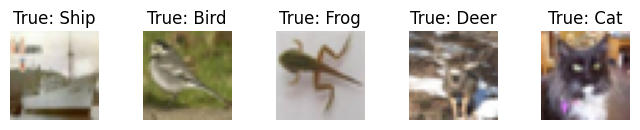

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random

# Завантаження даних
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Нормалізація даних
X_train, X_test = X_train / 255.0, X_test / 255.0

# Перетворення міток у категоріальні дані
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Побудова моделі
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

# Вибір випадкових зображень для перевірки
indices = random.sample(range(len(X_test)), 5)
images = X_test[indices]
true_labels = y_test[indices]
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Виведення результатів
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Налаштування відступів між підграфіками
plt.figure(figsize=(8, 5))
plt.subplots_adjust(wspace=0.5)
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'True: {class_names[np.argmax(true_labels[i])]}', fontsize=12)
    plt.xlabel(f'Pred: {class_names[predicted_labels[i]]}', fontsize=12)
    plt.axis('off')
plt.show()
